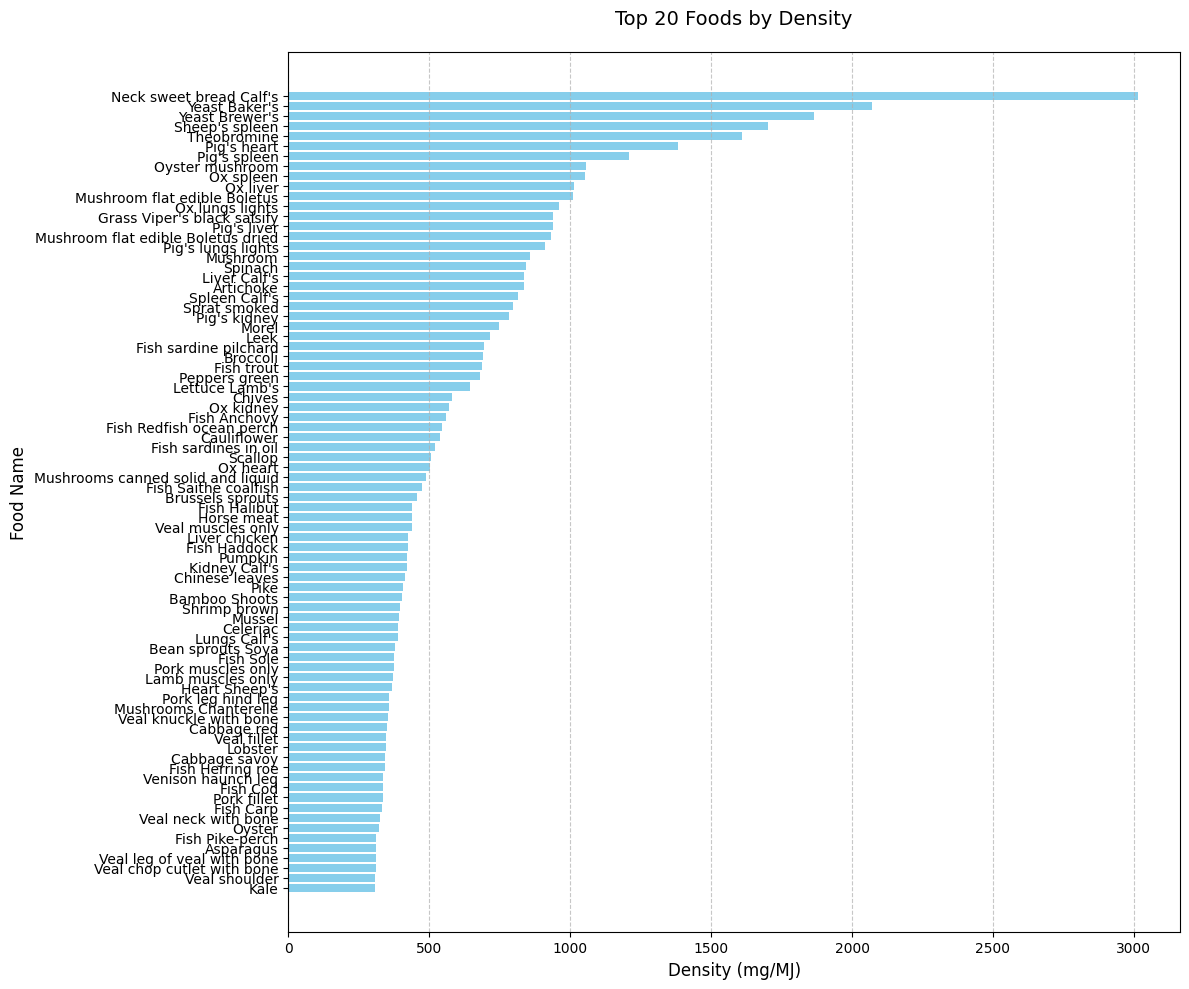

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
df = pd.read_csv('data/purine.csv')

# Sort the DataFrame by the 'density' column in descending order
df_sorted = df.sort_values(by='density', ascending=False)

# Take top 20 items for better visibility
df_top20 = df_sorted.head(80)

# Create the plot with larger figure size
plt.figure(figsize=(12, 10))

# Create horizontal bar plot
plt.barh(df_top20['foodname'], df_top20['density'], color='skyblue')

# Customize the plot
plt.xlabel('Density (mg/MJ)', fontsize=12)
plt.ylabel('Food Name', fontsize=12)
plt.title('Top 20 Foods by Density', fontsize=14, pad=20)

# Adjust y-axis labels for better readability
plt.yticks(fontsize=10)

# Add more space for labels
plt.subplots_adjust(left=0.4)  # Increase left margin for food names

# Invert y-axis to have the highest density at the top
plt.gca().invert_yaxis()

# Add gridlines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [13]:
import pandas as pd
import plotly.express as px

# Read the data
df = pd.read_csv('data/purine.csv')

# Create a function to categorize foods
def categorize_food(food_name):
    animal_keywords = ['fish', 'meat', 'liver', 'heart', 'kidney', 'spleen', 
                      'beef', 'pork', 'chicken', 'lamb', 'veal', 'duck', 
                      'goose', 'turkey', 'ham', 'sausage', 'mussel', 'shrimp',
                      'lobster', 'tongue', 'brain', 'lung']
    return 'Animal-based' if any(keyword in food_name.lower() for keyword in animal_keywords) else 'Plant-based'

# Add category column
df['food_category'] = df['foodname'].apply(categorize_food)

# Create interactive scatter plot
fig = px.scatter(
    df,
    x='purine',
    y='density',
    color='food_category',
    color_discrete_map={
        'Animal-based': 'red',
        'Plant-based': 'blue'
    },
    hover_data=['foodname'],
    title='Relationship between Purine Content and Density in Foods',
    labels={
        'purine': 'Purine Content (mg/100g)',
        'density': 'Density (mg/MJ)',
        'foodname': 'Food Name',
        'food_category': 'Food Category'
    },
    trendline="ols"
)

# Customize layout
fig.update_layout(
    width=1000,
    height=600,
    hovermode='closest',
    template='plotly_white',
    legend_title_text='Food Type'
)

# Show plot
fig.show()